In [22]:
import numpy as np
import pandas as pd
import glob
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
import imageio
import skimage

ModuleNotFoundError: No module named 'skimage'

In [10]:
path1 = 'posters/' #path where all posters are stored (images)
data = pd.read_csv("MovieGenre.csv", encoding="ISO-8859-1")

In [11]:
data.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [ ]:
#This will download all posters in the posters folder
import urllib.request

def dl_img(url,path,name):
    full_path = path+name+'.jpg'
    try:
        urllib.request.urlretrieve(url,full_path)
    except:
        print('file not available')
        
for i in range(len(data['Poster'])):
    url = data['Poster'].iloc[i]
    filename = str(data['imdbId'].iloc[i])
    dl_img(url,path1,filename)


file not available


In [12]:
image_glob = glob.glob(path1 + "/" + "*.jpg")
img_dict = {}

def get_id(filename):
    index_s = filename.rfind("s") + 2
    index_f = filename.rfind(".jpg")
    return filename[index_s:index_f]

In [13]:
for fn in image_glob:
    try:
        img_dict[get_id(fn)] = imageio.imread(fn)
    except:
        pass

In [14]:
def show_img(id):
    title = data[data["imdbId"] == int(id)]["Title"].values[0]
    genre = data[data["imdbId"] == int(id)]["Genre"].values[0]
    plt.imshow(img_dict[id])
    plt.title("{} \n {}".format(title, genre))

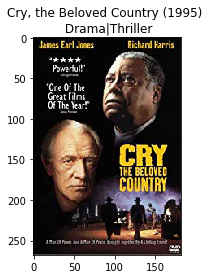

In [15]:
show_img("112749")

In [19]:
def preprocess(img, size=(150, 101)):
    #img = scipy.misc.imresize(img, size)
    img = skimage.transform.resize(img, size)
    img = img.astype(np.float32)
    img = (img / 127.5) - 1.
    return img

In [20]:
def prepare_data(data, img_dict, size=(150, 101)):
    print("Generation dataset...")
    dataset = []
    y = []
    ids = []
    label_dict = {"word2idx": {}, "idx2word": []}
    idx = 0
    genre_per_movie = data["Genre"].apply(lambda x: str(x).split("|"))
    for l in [g for d in genre_per_movie for g in d]:
        if l in label_dict["idx2word"]:
            pass
        else:
            label_dict["idx2word"].append(l)
            label_dict["word2idx"][l] = idx
            idx += 1
    n_classes = len(label_dict["idx2word"])
    print("identified {} classes".format(n_classes))
    n_samples = len(img_dict)
    print("got {} samples".format(n_samples))
    for k in img_dict:
        try:
            g = data[data["imdbId"] == int(k)]["Genre"].values[0].split("|")
            img = preprocess(img_dict[k], size)
            if img.shape != (150, 101, 3):
                continue
            l = np.sum([np.eye(n_classes, dtype="uint8")[label_dict["word2idx"][s]] 
                                                        for s in g], axis=0)
            y.append(l)
            dataset.append(img)
            ids.append(k)
        except:
            print('error')
    print("DONE")
    return dataset, y, label_dict, ids

In [21]:
SIZE = (150, 101)
dataset, y, label_dict, ids =  prepare_data(data, img_dict, size=SIZE)

Generation dataset...
identified 29 classes
got 105 samples
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
DONE


In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

Using TensorFlow backend.


In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=(SIZE[0], SIZE[1], 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(29, activation='sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
n = 10000
model.fit(np.array(dataset[: n]), np.array(y[: n]), batch_size=16, epochs=5,
          verbose=1, validation_split=0.1)

Train on 63 samples, validate on 7 samples
Epoch 1/5
63/63 [==============================] - 55s 867ms/step - loss: 0.5800 - acc: 0.6831 - val_loss: 0.4645 - val_acc: 0.9360
Epoch 2/5
63/63 [==============================] - 39s 621ms/step - loss: 0.4084 - acc: 0.8166 - val_loss: 0.2990 - val_acc: 0.9212
Epoch 3/5
63/63 [==============================] - 36s 577ms/step - loss: 0.3492 - acc: 0.8555 - val_loss: 0.3108 - val_acc: 0.9310
Epoch 4/5
63/63 [==============================] - 36s 578ms/step - loss: 0.3409 - acc: 0.8681 - val_loss: 0.3340 - val_acc: 0.9360
Epoch 5/5
63/63 [==============================] - 38s 607ms/step - loss: 0.2866 - acc: 0.8927 - val_loss: 0.2476 - val_acc: 0.9360


In [20]:
n_test = 100
X_test = dataset[n:n + n_test]
y_test = y[n:n + n_test]

In [21]:
pred = model.predict(np.array(X_test))

In [22]:
def show_example(idx):
    N_true = int(np.sum(y_test[idx]))
    show_img(ids[n + idx])
    print("Prediction: {}".format("|".join(["{} ({:.3})".format(label_dict["idx2word"][s],
                                                                pred[idx][s])
                                            for s in pred[idx].argsort()[-N_true:][::-1]])))

Prediction: Drama (0.708)|Comedy (0.311)|Crime (0.289)


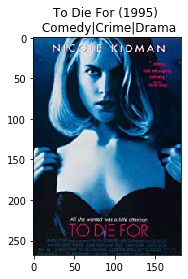

In [43]:
show_example(3)